<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.6 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 9.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135721 sha256=48d5e0b3252e712a8d69acbc4e4fbb1aa38af8c0017075c5b4fcce7b663e6198
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/ce/84/33a31720d239d310cfff49d7bf56da412b6caefec2e112f327
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29

In [2]:
import yfinance as yf

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Print basic information about the Ticker object
print("Ticker Information for TSLA:")
print("Company Name:", tesla_ticker.info['longName'])
print("Exchange:", tesla_ticker.info['exchange'])
print("Industry:", tesla_ticker.info['industry'])

Ticker Information for TSLA:
Company Name: Tesla, Inc.
Exchange: NMS
Industry: Auto Manufacturers


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data with the period set to max
tesla_data = tesla_ticker.history(period="max")

# Display the first few rows of the DataFrame
print("Tesla Stock Data:")
print(tesla_data.head())

# Save the DataFrame to a CSV file (optional)
tesla_data.to_csv('tesla_stock_data.csv')

Tesla Stock Data:
                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla with the ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data with the period set to max
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the DataFrame in-place
tesla_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print("Tesla Stock Data after Resetting Index:")
print(tesla_data.head())

Tesla Stock Data after Resetting Index:
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [7]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [8]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable named html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")

Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [9]:
from bs4 import BeautifulSoup

# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Now we can work with the parsed HTML content using BeautifulSoup
# For example, print the title of the webpage
title = soup.title
print(f"Webpage Title: {title.text if title else 'Title not found'}")

# we can also find other HTML elements, extract data, and navigate the HTML structure as needed
# For example, find all paragraphs in the HTML
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print(f"Paragraph: {paragraph.text}")

Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends
Paragraph: Backlinks from other websites are the lifeblood of our site and a primary source of new traffic.
If you use our chart images on your site or blog, we ask that you provide attribution via a "dofollow" link back to this page.  We have provided a few examples below that you can copy and paste to your site:




Link Preview
HTML Code (Click to Copy)




Tesla Revenue 2010-2022 | TSLA



Macrotrends



Source





Your image export is now complete.  Please check your download folder. 

Paragraph: 
If you use our chart images on your site or blog, we ask that you provide attribution via a "dofollow" link back to this page.  We have provided a few examples below that you can copy and paste to your site:




Link Preview
HTML Code (Click to Copy)




Tesla Revenue 2010-2022 | TSLA



Macrotrends



Source





Your image export is now complete.  Please check your download folder. 

Paragraph: If you use our chart images on 

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [10]:
from bs4 import BeautifulSoup
import pandas as pd

# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table containing Tesla Revenue
table = soup.find('table')

# Extract data from the table rows
data_rows = []
for row in table.find_all('tr')[1:]:
    # Extract data from each cell in the row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    data_rows.append(row_data)

# Create a DataFrame with extracted data and column names
tesla_revenue = pd.DataFrame(data_rows, columns=['Date', 'Revenue'])

# Display the DataFrame
print("Tesla Revenue DataFrame:")
print(tesla_revenue)

Tesla Revenue DataFrame:
    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
# Drop rows with null values in the entire DataFrame
tesla_revenue.dropna(inplace=True)

# Keep only rows where the "Revenue" column is not an empty string
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [15]:
# Display the last 5 rows of the DataFrame using the tail function
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [16]:
import yfinance as yf

# Create a ticker object for GameStop with the ticker symbol GME
gme_ticker = yf.Ticker("GME")

# Print basic information about the Ticker object
print("Ticker Information for GME:")
print("Company Name:", gme_ticker.info['longName'])
print("Exchange:", gme_ticker.info['exchange'])
print("Industry:", gme_ticker.info['industry'])

Ticker Information for GME:
Company Name: GameStop Corp.
Exchange: NYQ
Industry: Specialty Retail


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [17]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop with the ticker symbol GME
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with the period set to max
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the DataFrame
print("GameStop Stock Data:")
print(gme_data.head())

# Save the DataFrame to a CSV file (optional)
gme_data.to_csv('gme_stock_data.csv')

GameStop Stock Data:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [18]:
# Reset the index of the gme_data DataFrame in-place
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame using the head function
print("First five rows of GameStop Stock Data:")
print(gme_data.head())

First five rows of GameStop Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [19]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable named html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status Code: {response.status_code}")

Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [20]:
from bs4 import BeautifulSoup

# Create a BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Example: Print the title of the webpage
title = soup.title
print(f"Webpage Title: {title.text if title else 'Title not found'}")

# Example: Find all paragraphs in the HTML
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    print(f"Paragraph: {paragraph.text}")

# Example: Find the first link in the HTML
first_link = soup.find('a')
print(f"First Link: {first_link['href'] if first_link else 'Link not found'}")

Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends
Paragraph: Backlinks from other websites are the lifeblood of our site and a primary source of new traffic.
Paragraph: 

Paragraph: If you use our chart images on your site or blog, we ask that you provide attribution via a "dofollow" link back to this page.  We have provided a few examples below that you can copy and paste to your site:
Paragraph: Your image export is now complete.  Please check your download folder. 
Paragraph: Backlinks from other websites are the lifeblood of our site and a primary source of new traffic.
Paragraph: 

Paragraph: If you use our datasets on your site or blog, we ask that you provide attribution via a "dofollow" link back to this page.  We have provided a few examples below that you can copy and paste to your site:
Paragraph: Your data export is now complete.  Please check your download folder. 
Paragraph: 
First Link: https://web.archive.org/web/20200814131437/https://www.macrotrends.net/


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing the GameStop Revenue table
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing GameStop Revenue
    table = soup.find('table')

    # Extract data from the table
    data = []
    for row in table.find_all('tr')[1:]:  # skipping the header row
        date, revenue = [cell.text.strip() for cell in row.find_all('td')]
        revenue = revenue.replace('$', '').replace(',', '')  # remove dollar sign and comma
        data.append({'Date': date, 'Revenue': revenue})

    # Create a DataFrame from the extracted data
    gme_revenue = pd.DataFrame(data)

    # Display the DataFrame
    print("GameStop Revenue Data:")
    print(gme_revenue.head())

    # Optional: Save the DataFrame to a CSV file
    gme_revenue.to_csv('gme_revenue_data.csv', index=False)

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

GameStop Revenue Data:
   Date Revenue
0  2020    6466
1  2019    8285
2  2018    8547
3  2017    7965
4  2016    9364


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
print("Last five rows of gme_revenue DataFrame:")
print(gme_revenue.tail())

Last five rows of gme_revenue DataFrame:
    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [57]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

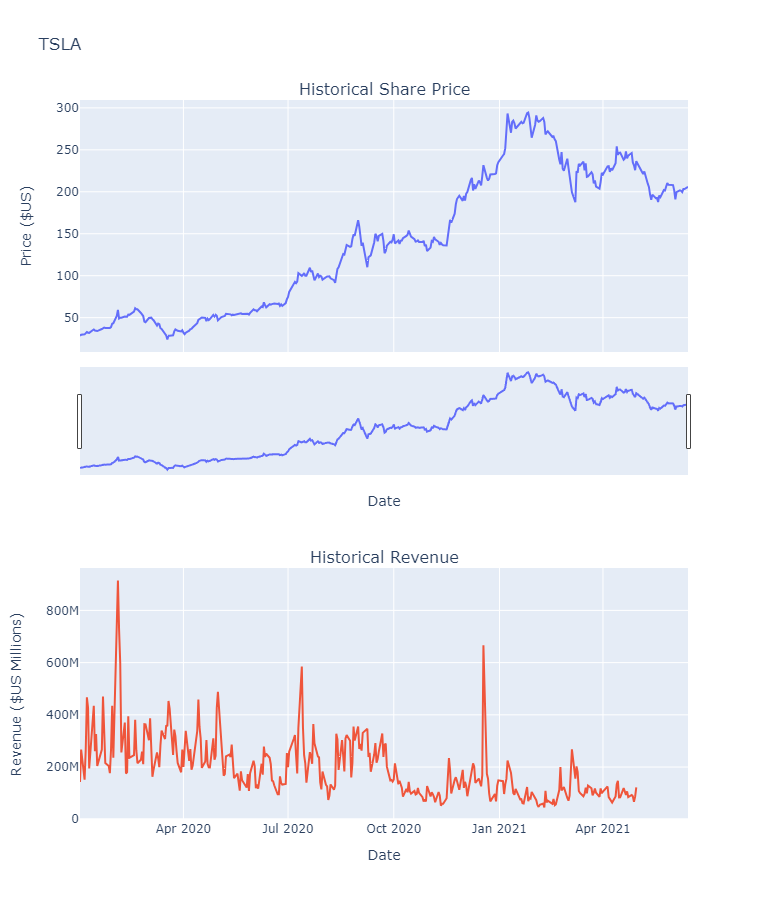

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
stock_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(stock_data, revenue_data, 'TSLA')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


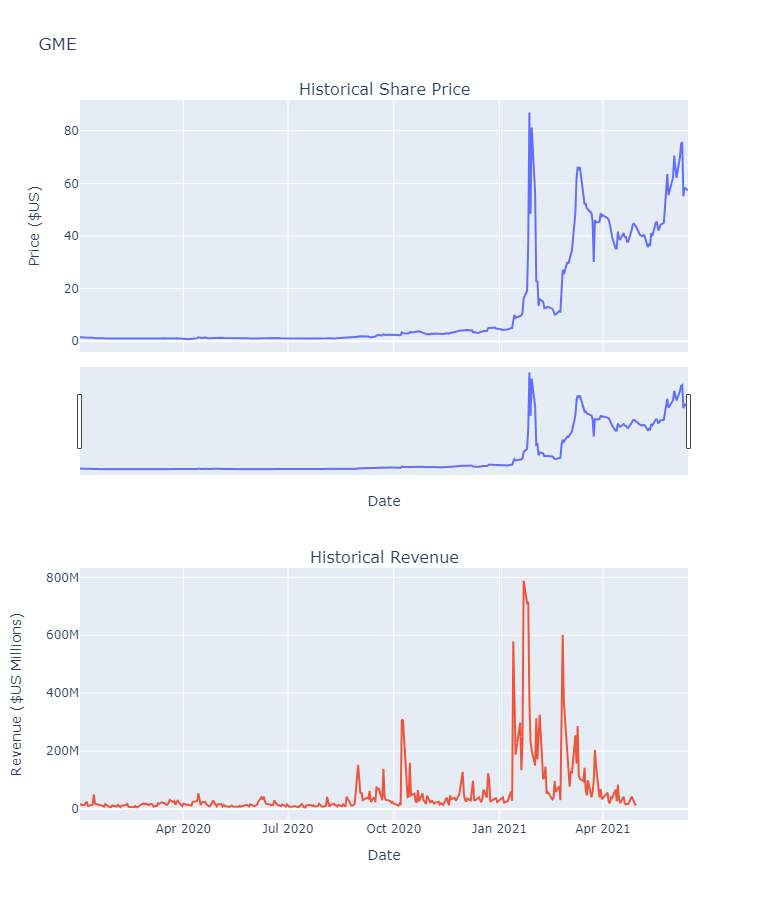

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd

stock_data = yf.download("GME", start="2020-01-01", end="2021-09-30", progress=False)
revenue_data = yf.download("GME", start="2020-01-01", end="2021-09-30", progress=False)
stock_data.reset_index(inplace=True)
revenue_data.reset_index(inplace=True)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, 
                        shared_xaxes=True, 
                        subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        vertical_spacing=.3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(
        x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True),
        y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                             y=revenue_data_specific.Volume.astype("float"),
                             name="Volume"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    fig.show()
    
make_graph(stock_data, revenue_data, 'GME')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
